# wine.data

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Separação em conjunto de treinamento (70% da base) e teste (30% da base)

In [2]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#X = Variables | Y = Class
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

# <i>Random Forests</i>

In [3]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                criterion='entropy',
                                max_features='sqrt',
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

 1) Color intensity                0.174273
 2) Flavanoids                     0.167982
 3) Proline                        0.149730
 4) OD280/OD315 of diluted wines   0.145087
 5) Alcohol                        0.096237
 6) Hue                            0.076172
 7) Total phenols                  0.065276
 8) Alcalinity of ash              0.032060
 9) Magnesium                      0.022632
10) Malic acid                     0.022628
11) Proanthocyanins                0.021253
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013316


<Figure size 640x480 with 1 Axes>

In [17]:
import graphviz
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                max_features='sqrt',
                                random_state=0)
clf = clf.fit(X_train, y_train)

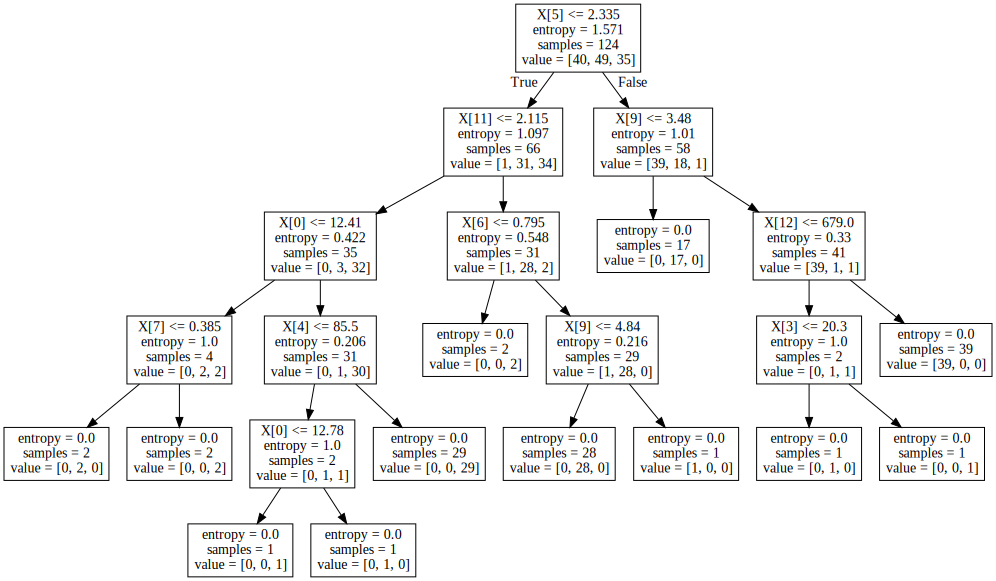

In [18]:
dot_data = tree.export_graphviz(clf, out_file= None) 
graphviz.Source(dot_data)